<a href="https://colab.research.google.com/github/mgnarag/painting_restoration/blob/main/Dirt_layer_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!ls drive/My\ Drive
file_path = "/content/drive/MyDrive/Baumgartner screenshots/Testing/portion only/"

In [2]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os
import cv2
from skimage import color

In [3]:
def visualize_dirt_layer(dirty_path, clean_path, plot1=False, plot2 = False):
    dirty = Image.open(dirty_path).convert('RGB')
    clean = Image.open(clean_path).convert('RGB')

    dirty_np = np.array(dirty, dtype=np.float64)# Convert images to NumPy arrays
    clean_np = np.array(clean, dtype=np.float64)

    dirty_r, dirty_g, dirty_b = dirty_np[:, :, 0], dirty_np[:, :, 1], dirty_np[:, :, 2]# Split the images into R, G, B channels
    clean_r, clean_g, clean_b = clean_np[:, :, 0], clean_np[:, :, 1], clean_np[:, :, 2]

    divided_r = np.divide(dirty_r,clean_r)# Perform element-wise subtraction for each channel
    divided_g = np.divide(dirty_g,clean_g)
    divided_b = np.divide(dirty_b,clean_b)

    if plot1:
        fig, axs = plt.subplots(3, 3, figsize=(10, 10))

        im_r = axs[0, 0].imshow(dirty_r, cmap='Reds')# Plot the Dirty Red channel
        axs[0, 0].set_title('Dirty Red Channel')
        axs[0, 0].axis('off')
        fig.colorbar(im_r, ax=axs[0, 0], orientation='vertical')

        im_g = axs[0, 1].imshow(dirty_g, cmap='Greens')# Plot the Dirty Green channel
        axs[0, 1].set_title('Dirty Green Channel')
        axs[0, 1].axis('off')
        fig.colorbar(im_g, ax=axs[0, 1], orientation='vertical')

        im_b = axs[0, 2].imshow(dirty_b, cmap='Blues')# Plot the Dirty Blue channel
        axs[0, 2].set_title('Dirty Blue Channel')
        axs[0, 2].axis('off')
        fig.colorbar(im_b, ax=axs[0, 2], orientation='vertical')

        im_r = axs[1, 0].imshow(clean_r, cmap='Reds')# Plot the Clean Red channel
        axs[1, 0].set_title('Clean Red Channel')
        axs[1, 0].axis('off')
        fig.colorbar(im_r, ax=axs[1, 0], orientation='vertical')

        im_g = axs[1, 1].imshow(clean_g, cmap='Greens')# Plot the Clean Green channel
        axs[1, 1].set_title('Clean Green Channel')
        axs[1, 1].axis('off')
        fig.colorbar(im_g, ax=axs[1, 1], orientation='vertical')

        im_b = axs[1, 2].imshow(clean_b, cmap='Blues')# Plot the Clean Blue channel
        axs[1, 2].set_title('Clean Blue Channel')
        axs[1, 2].axis('off')
        fig.colorbar(im_b, ax=axs[1, 2], orientation='vertical')

        im_r = axs[2, 0].imshow(divided_r, cmap='Reds')# Plot the Divided Red channel
        axs[2, 0].set_title('Divided Red Channel')
        axs[2, 0].axis('off')
        fig.colorbar(im_r, ax=axs[2, 0], orientation='vertical')

        im_g = axs[2, 1].imshow(divided_g, cmap='Greens')# Plot the Divided Green channel
        axs[2, 1].set_title('Divided Green Channel')
        axs[2, 1].axis('off')
        fig.colorbar(im_g, ax=axs[2, 1], orientation='vertical')

        im_b = axs[2, 2].imshow(divided_b, cmap='Blues')# Plot the Divided Blue channel
        axs[2, 2].set_title('Divided Blue Channel')
        axs[2, 2].axis('off')
        fig.colorbar(im_b, ax=axs[2, 2], orientation='vertical')

        plt.tight_layout()
        #plt.savefig('subtracted_channels_with_colorbars.png', bbox_inches='tight')
        plt.show()

    if plot2:
        fig, axs = plt.subplots(1, 3, figsize=(15, 45))
        axs[0].imshow(dirty)
        axs[0].set_title('Original')
        axs[0].axis('off')
        axs[1].imshow(clean)
        axs[1].set_title('Restored')
        axs[1].axis('off')

        divided_image = np.stack((divided_r, divided_g, divided_b), axis=-1)# Merge subtracted channels back into a single image
        divided_image = (divided_image * 255.0).astype(np.uint8)
        #divided_image = np.clip(divided_image * 255.0, 0, 255).astype(np.uint8)
        axs[2].imshow(divided_image.astype(np.uint8))
        axs[2].set_title('Visualized Varnish + Dirt layer')
        axs[2].axis('off')
        plt.show()


# **VISUALIZE HERE:**

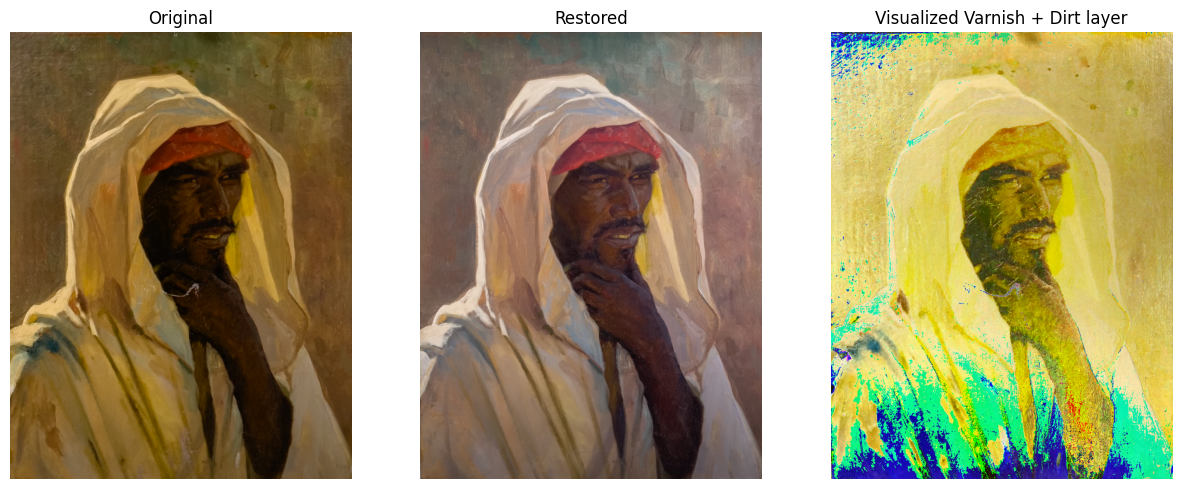

In [6]:
dirty_path = file_path + "Moroccan painting/[09-Before]Conserving a Moroccan Portrait.png"
clean_path = file_path + "Moroccan painting/[09-After] Conserving a Moroccan Portrait.png"

visualize_dirt_layer(dirty_path,clean_path, plot1=False, plot2=True)

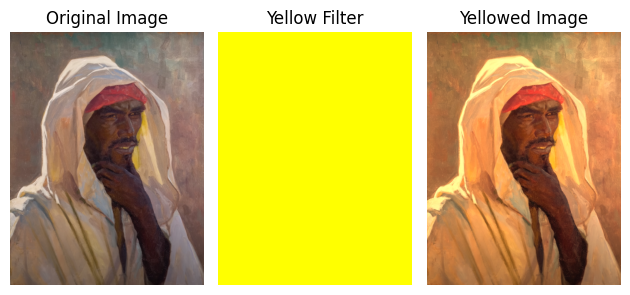

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def yellow_image(image_path):
    # Open the image
    img = Image.open(image_path)

    # Convert the image to RGB mode (if not already)
    img = img.convert("RGB")

    # Get the image data as a list of tuples
    pixels = list(img.getdata())

    # Apply yellowish filter to each pixel
    yellowish_pixels = [(int(r * 1.5), int(g * 1.2), int(b * 0.8)) for (r, g, b) in pixels]

    # Create a new image with the modified pixel data
    yellowish_img = Image.new('RGB', img.size)
    yellowish_img.putdata(yellowish_pixels)

    filter = np.array(yellowish_img)/np.array(img)
    filter = np.clip(filter, 0, 255).astype(np.uint8)

    # Plot the original image
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Plot the yellow filter
    plt.subplot(1, 3, 2)
    yellow_filter = Image.new('RGB', img.size, color='yellow')
    plt.imshow(yellow_filter)
    plt.title('Yellow Filter')
    plt.axis('off')

    # Plot the yellowed image after the filter
    plt.subplot(1, 3, 3)
    plt.imshow(yellowish_img)
    plt.title('Yellowed Image')
    plt.axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    return img,yellowish_img, filter

# Example usage:
img,yellow_image, filter = yellow_image(clean_path)


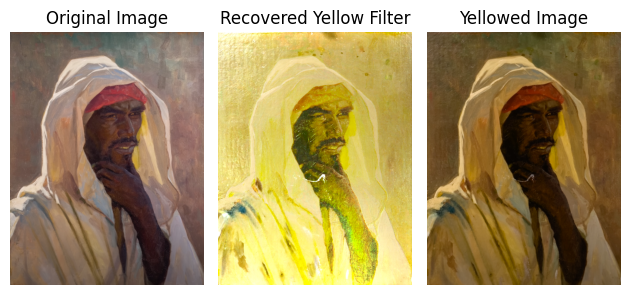

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def recover_yellow_filter(original_path, yellowed_img):
    # Open the original image
    original_img = Image.open(original_path).convert('RGB')
    yellowed_img = Image.open(yellowed_img).convert('RGB')

    # Convert images to arrays for numerical operations
    original_arr = np.array(original_img, dtype=np.float32)
    yellowed_arr = np.array(yellowed_img, dtype=np.float32)

    # Ensure images have the same shape
    if original_arr.shape != yellowed_arr.shape:
        raise ValueError("Images must have the same dimensions.")

    # Normalize pixel values to range [0, 1]
    original_arr_norm = original_arr / 255.0
    yellowed_arr_norm = yellowed_arr / 255.0

    # Divide yellowed image by original image to isolate the yellow filter
    yellow_filter_arr = yellowed_arr_norm / (original_arr_norm + 1e-6)

    # Clip values to ensure they are in valid range [0, 255]
    yellow_filter_arr = np.clip(yellow_filter_arr * 255.0, 0, 255).astype(np.uint8)

    # Convert array back to image
    yellow_filter_img = Image.fromarray(yellow_filter_arr)

    # Plot the original image, the recovered yellow filter, and the yellowed image
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(yellow_filter_img)
    plt.title('Recovered Yellow Filter')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(yellowed_img)
    plt.title('Yellowed Image')
    plt.axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    return yellow_filter_img

# Example usage:
yellow_filter_img = recover_yellow_filter(clean_path, dirty_path)


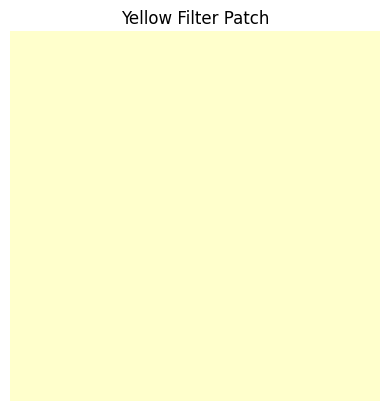

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the factors for yellow filter
red_factor = 1.5
green_factor = 1.2
blue_factor = 0.8

# Create an array representing the yellow filter
yellow_filter = np.array([red_factor, green_factor, blue_factor])

# Create an image patch filled with the color specified by the filter
patch_size = (100, 100, 3)  # Width, height, and 3 channels for RGB
yellow_patch = np.ones(patch_size) * yellow_filter

# Plot the yellow filter patch
plt.imshow(yellow_patch)
plt.title('Yellow Filter Patch')
plt.axis('off')
plt.show()
